In [5]:
l

NameError: name 'l' is not defined

b=0.5, rho=-0.9
Minimum location l_min = 0.35559930
l_star = 2.06474160
min g_plus(l_min) = -4.67134776e-01


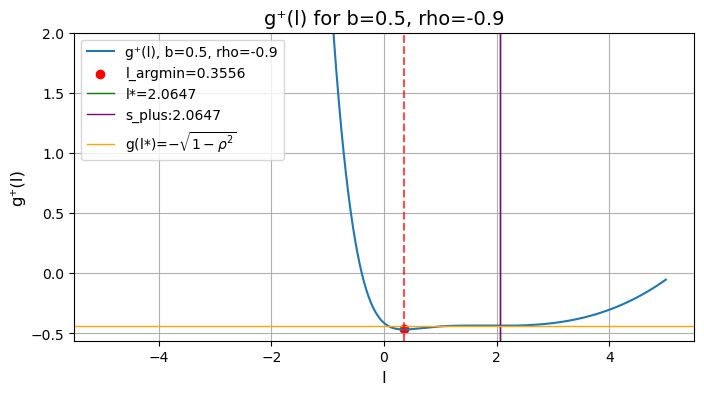

--------------------------------------------------
b=0.5, rho=-0.5
Minimum location l_min = 0.57735025
l_star = 0.57735027
min g_plus(l_min) = -8.66025404e-01


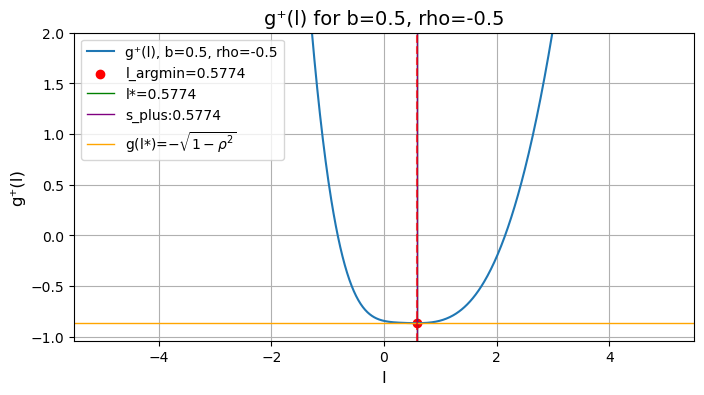

--------------------------------------------------
b=0.5, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


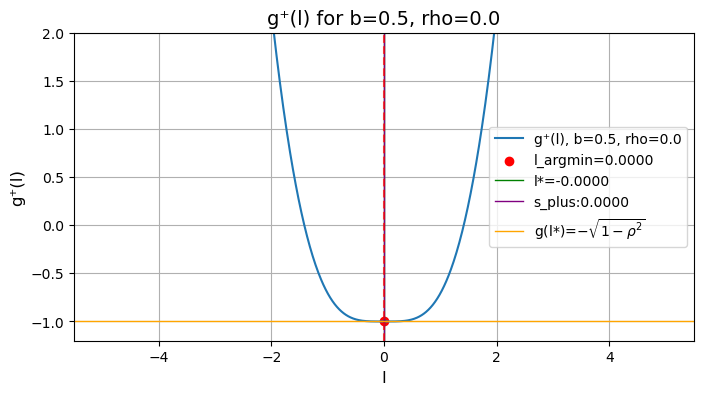

--------------------------------------------------
b=0.5, rho=0.5
Minimum location l_min = 0.26409148
l_star = -0.57735027
min g_plus(l_min) = -9.28303345e-01


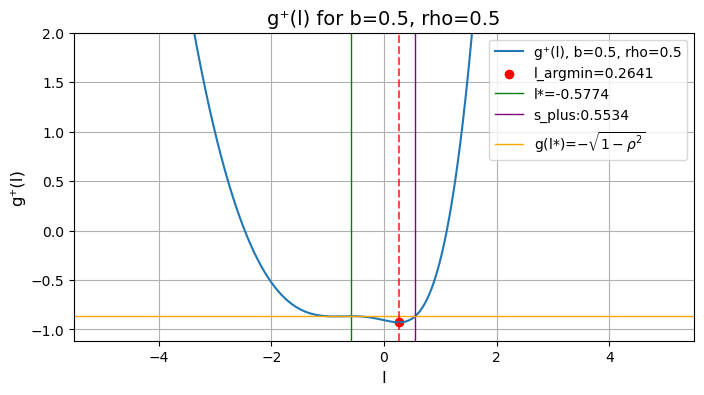

--------------------------------------------------
b=0.5, rho=0.9
Minimum location l_min = 0.35219418
l_star = -2.06474160
min g_plus(l_min) = -8.68042166e-01


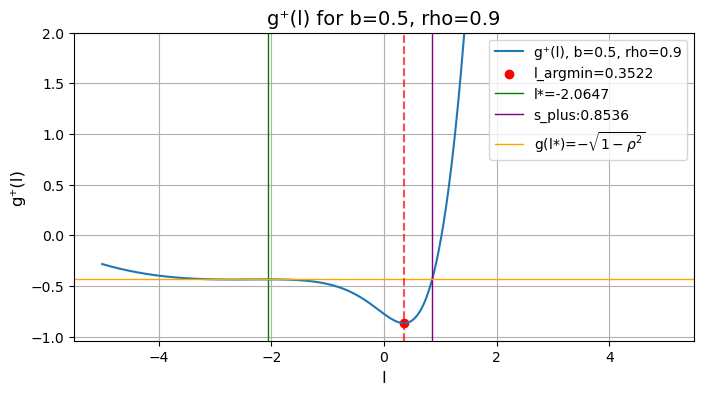

--------------------------------------------------
b=0.8, rho=-0.9
Minimum location l_min = 2.06474165
l_star = 2.06474160
min g_plus(l_min) = -4.35889894e-01


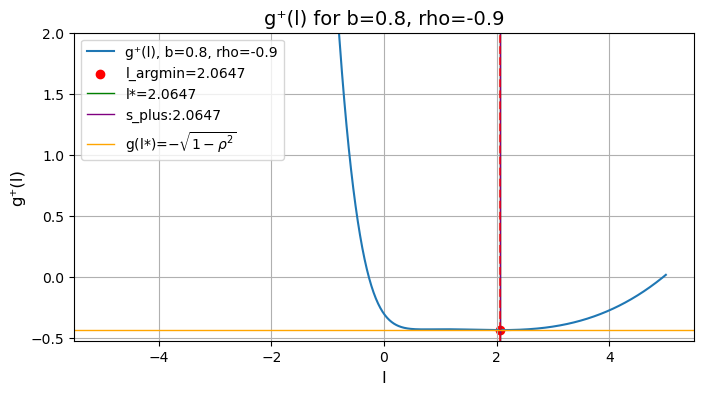

--------------------------------------------------
b=0.8, rho=-0.5
Minimum location l_min = 0.57735025
l_star = 0.57735027
min g_plus(l_min) = -8.66025404e-01


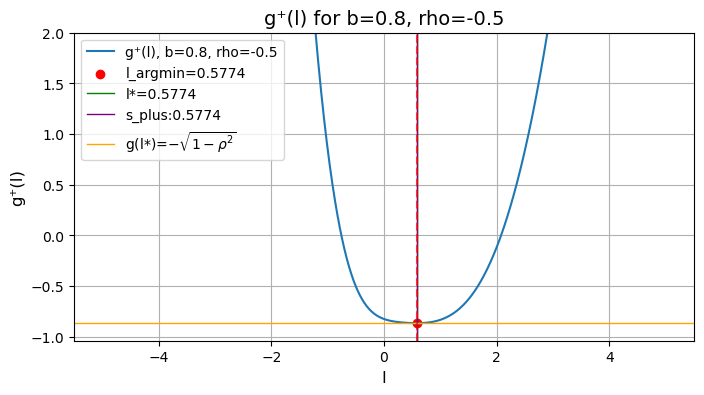

--------------------------------------------------
b=0.8, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


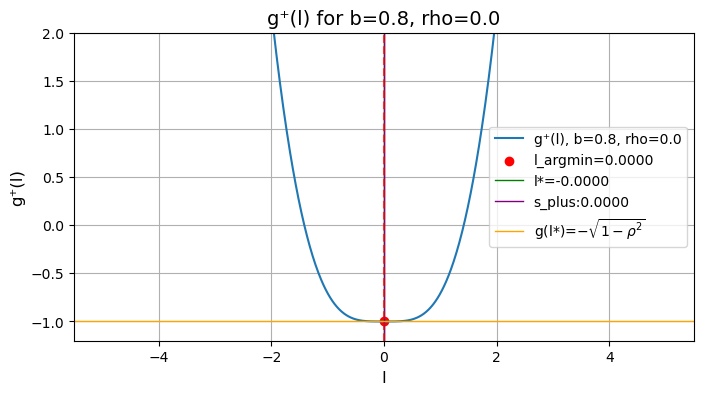

--------------------------------------------------
b=0.8, rho=0.5
Minimum location l_min = 0.40322386
l_star = -0.57735027
min g_plus(l_min) = -9.85655270e-01


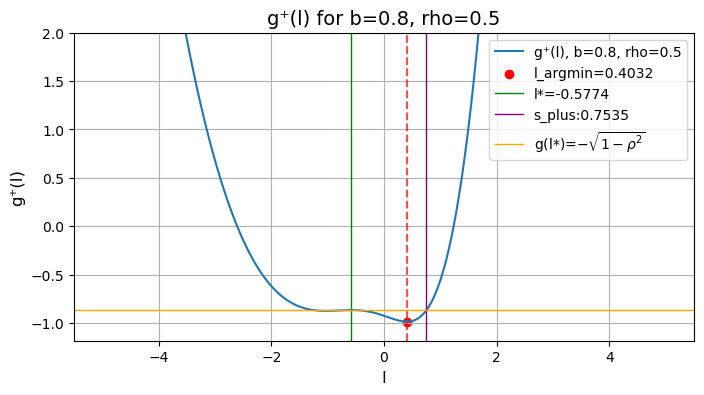

--------------------------------------------------
b=0.8, rho=0.9
Minimum location l_min = 0.61244070
l_star = -2.06474160
min g_plus(l_min) = -1.18074144e+00


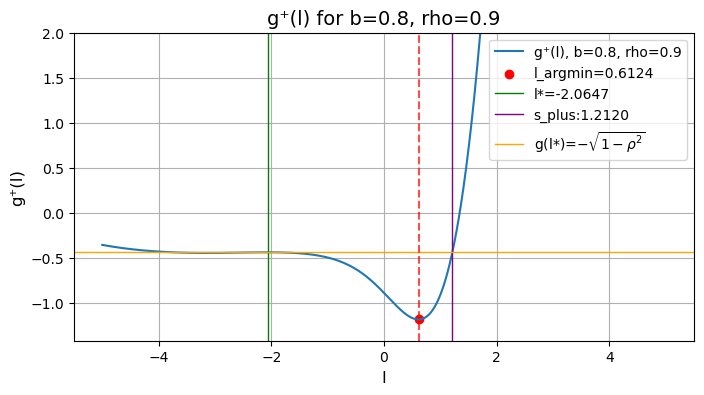

--------------------------------------------------
b=1.0, rho=-0.9
Minimum location l_min = 2.06474165
l_star = 2.06474160
min g_plus(l_min) = -4.35889894e-01


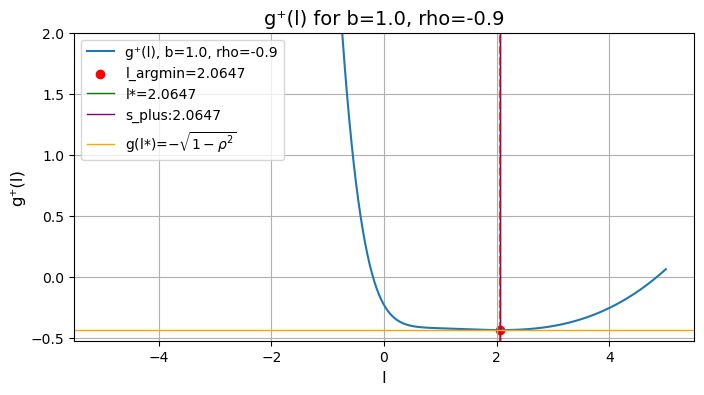

--------------------------------------------------
b=1.0, rho=-0.5
Minimum location l_min = 0.57735028
l_star = 0.57735027
min g_plus(l_min) = -8.66025404e-01


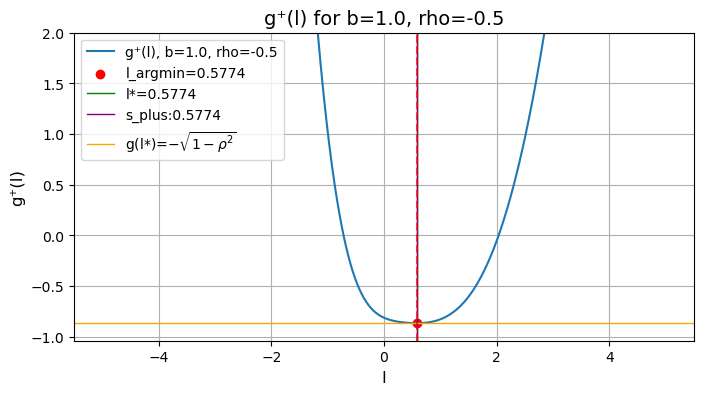

--------------------------------------------------
b=1.0, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


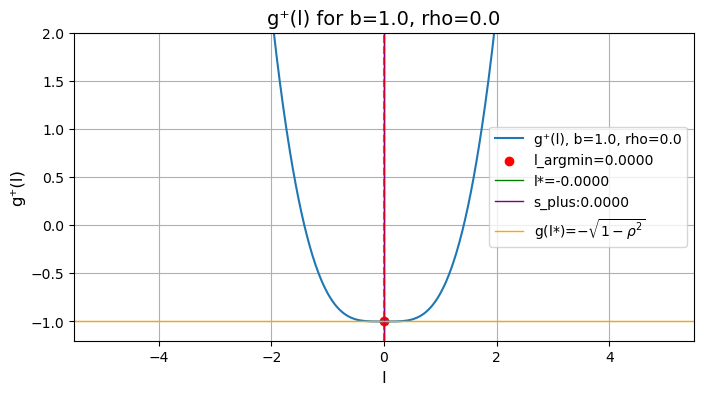

--------------------------------------------------
b=1.0, rho=0.5
Minimum location l_min = 0.49775054
l_star = -0.57735027
min g_plus(l_min) = -1.03801724e+00


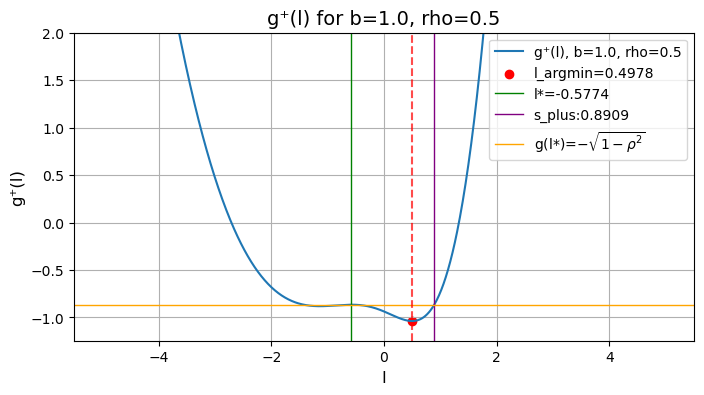

--------------------------------------------------
b=1.2, rho=-0.5
Minimum location l_min = 0.57735028
l_star = 0.57735027
min g_plus(l_min) = -8.66025404e-01


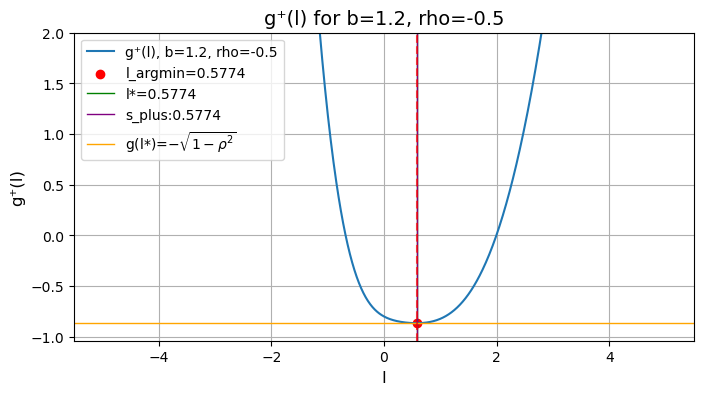

--------------------------------------------------
b=1.2, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


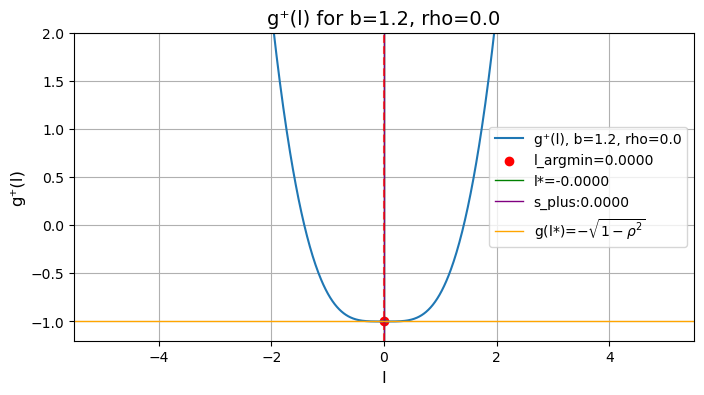

--------------------------------------------------
b=1.2, rho=0.3
Minimum location l_min = 0.42929185
l_star = -0.31448545
min g_plus(l_min) = -1.01359293e+00


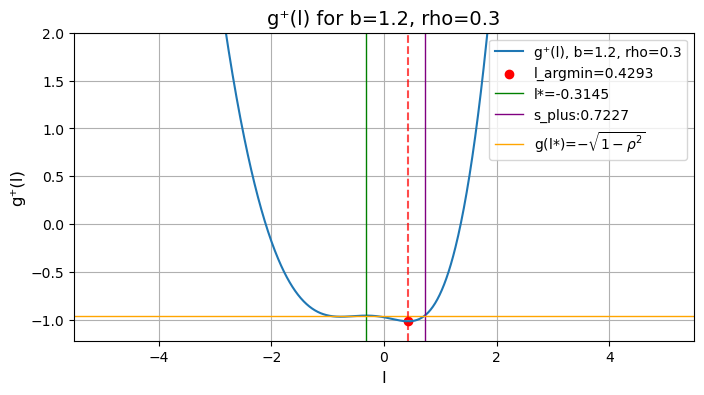

--------------------------------------------------
b=1.5, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


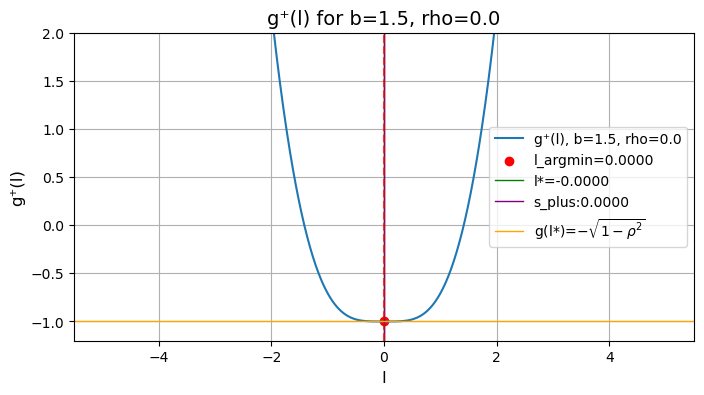

--------------------------------------------------
b=1.5, rho=0.2
Minimum location l_min = 0.40771341
l_star = -0.20412415
min g_plus(l_min) = -1.01210153e+00


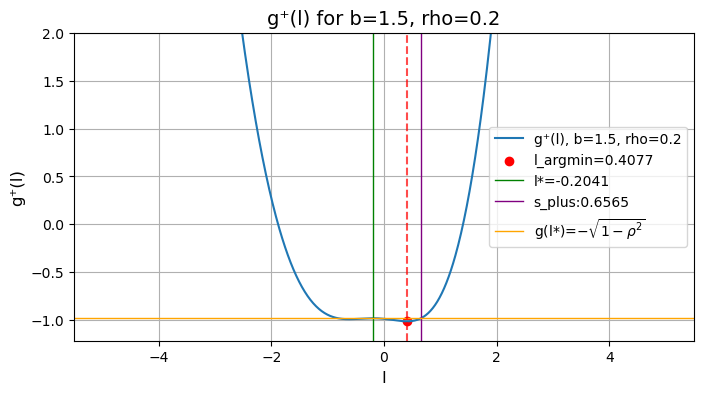

--------------------------------------------------
b=1.7, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


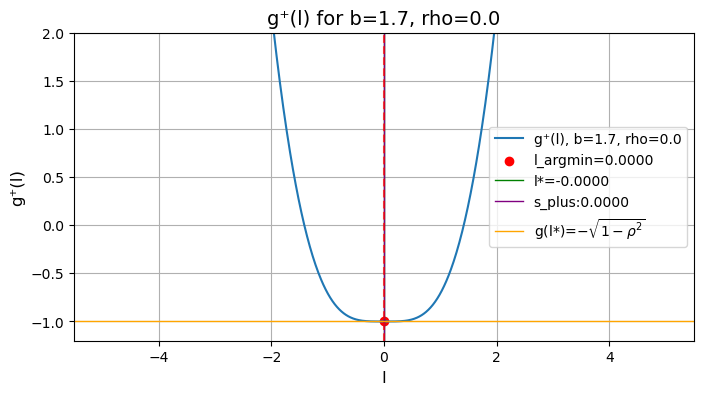

--------------------------------------------------


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def g_plus(l, b, rho):
    term1 = (rho * np.sqrt(l**2 + 1) + l)
    term2 = (np.sqrt(l**2 + 1) * (1/2 - b*rho/4) - b*rho/4)
    term3 = (rho*l + np.sqrt(l**2 + 1))
    return term1**2 * term2 - term3

def find_min_g_plus(b, rho):
    l_upper = 1e6
    l_lower = -1e6
    eps = 1e-8
    max_iter = 500

    iter_count = 0

    while l_upper - l_lower > eps:
        iter_count += 1
        if iter_count > max_iter:
            raise RuntimeError(f"Ternary search did not converge within {max_iter} iterations.")

        l1 = l_lower + (l_upper - l_lower) / 3
        l2 = l_upper - (l_upper - l_lower) / 3

        g1 = g_plus(l1, b, rho)
        g2 = g_plus(l2, b, rho)

        if g1 < g2:
            l_upper = l2
        else:
            l_lower = l1

    l_min = (l_lower + l_upper) / 2
    g_min = g_plus(l_min, b, rho)

    return l_min, g_min

test_cases = [
    (0.5, -0.9),
    (0.5, -0.5),
    (0.5, 0.0),
    (0.5, 0.5),
    (0.5, 0.9),
    
    (0.8, -0.9),
    (0.8, -0.5),
    (0.8, 0.0),
    (0.8, 0.5),
    (0.8, 0.9),
    
    (1.0, -0.9),
    (1.0, -0.5),
    (1.0, 0.0),
    (1.0, 0.5),
    
    (1.2, -0.5),
    (1.2, 0.0),
    (1.2, 0.3),
    
    (1.5, 0.0),
    (1.5, 0.2),
    
    (1.7, 0.0),
]



for idx, (b, rho) in enumerate(test_cases):
    if b * (1 + abs(rho)) >= 2:
        print("Wrong parameters")
        continue
    
    l_star = - rho / np.sqrt(1-rho**2)
    g_l_star = g_plus(l_star, b, rho)
    l_vals = np.linspace(-5, 5, 1000)
    g_vals = [g_plus(l, b, rho) for l in l_vals]

    l_argmin, g_min = find_min_g_plus(b, rho)
    
    def obj(s, b, rho):
        return g_plus(s, b, rho) + np.sqrt(1-rho**2)
    if l_argmin > l_star and not np.isclose(l_argmin, l_star):
        s_plus = brentq(obj, a=l_argmin, b=1e6, args=(b, rho))
    else:
        s_plus = l_star
    
    print(f"b={b}, rho={rho}")
    print(f"Minimum location l_min = {l_argmin:.8f}")
    print(f"l_star = {l_star:.8f}")
    print(f"min g_plus(l_min) = {g_min:.8e}")
    
    plt.figure(figsize=(8, 4))
    plt.plot(l_vals, g_vals, label=f"g⁺(l), b={b}, rho={rho}")
    plt.scatter(l_argmin, g_min, color='red', label=f"l_argmin={l_argmin:.4f}")
    plt.axvline(l_star, color='green', label=f'l*={-rho/np.sqrt(1-rho**2):.4f}', linewidth=1)
    plt.axvline(s_plus, color='purple', label=f's_plus:{s_plus:.4f}', linewidth=1)
    plt.axhline(-np.sqrt(1-rho**2), color='orange', linestyle='-', linewidth=1, label=r'g(l*)=$-\sqrt{1-\rho^2}$')
    plt.title(f"g⁺(l) for b={b}, rho={rho}", fontsize=14)
    plt.xlabel("l", fontsize=12)
    plt.ylabel("g⁺(l)", fontsize=12)
    plt.ylim([g_min * 1.2, 2])
    plt.axvline(l_argmin, color='red', linestyle='--', alpha=0.7)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("-" * 50)


b=0.5, rho=-0.9
Minimum location l_min = -0.35219417
l_star = 2.06474160
min g_plus(l_min) = -8.68042166e-01


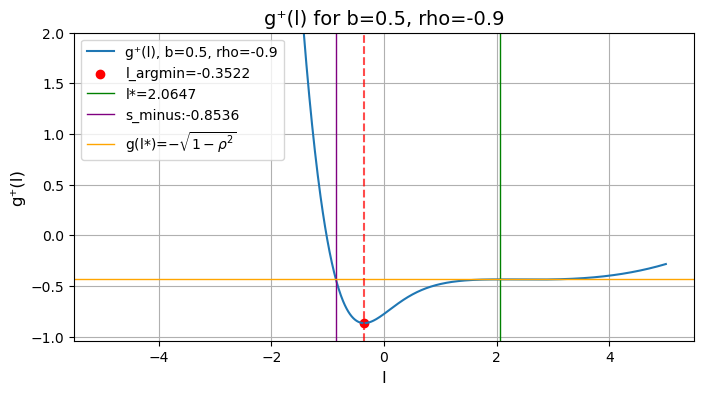

--------------------------------------------------
b=0.5, rho=-0.5
Minimum location l_min = -0.26409148
l_star = 0.57735027
min g_plus(l_min) = -9.28303345e-01


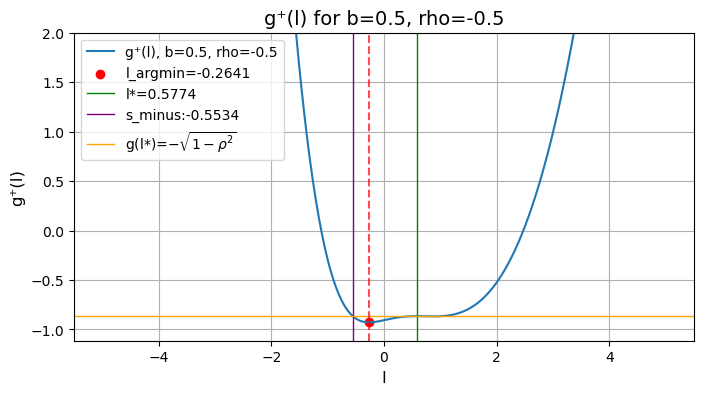

--------------------------------------------------
b=0.5, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


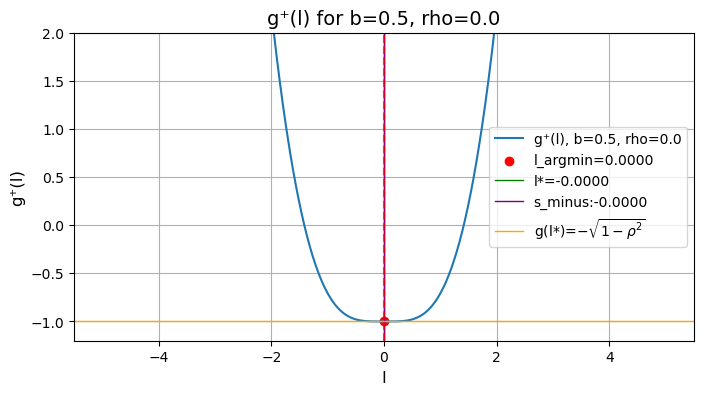

--------------------------------------------------
b=0.5, rho=0.5
Minimum location l_min = -0.57735025
l_star = -0.57735027
min g_plus(l_min) = -8.66025404e-01


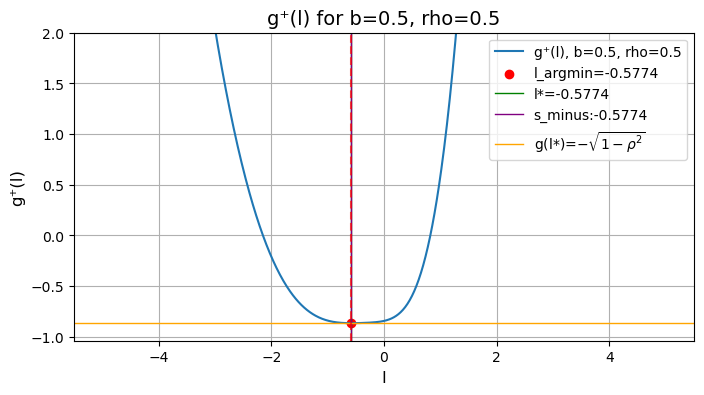

--------------------------------------------------
b=0.5, rho=0.9
Minimum location l_min = -0.35559928
l_star = -2.06474160
min g_plus(l_min) = -4.67134776e-01


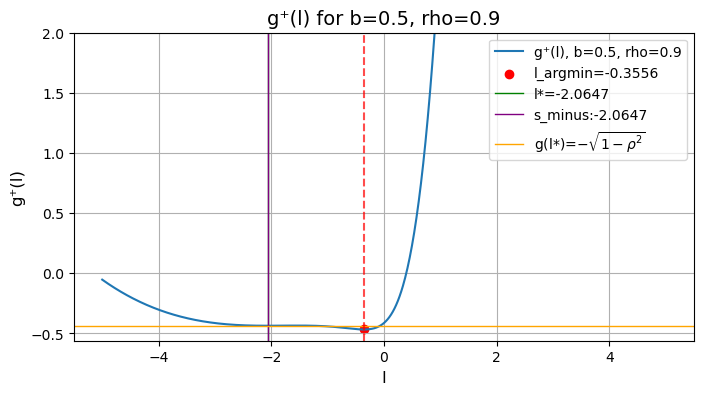

--------------------------------------------------
b=0.8, rho=-0.9
Minimum location l_min = -0.61244069
l_star = 2.06474160
min g_plus(l_min) = -1.18074144e+00


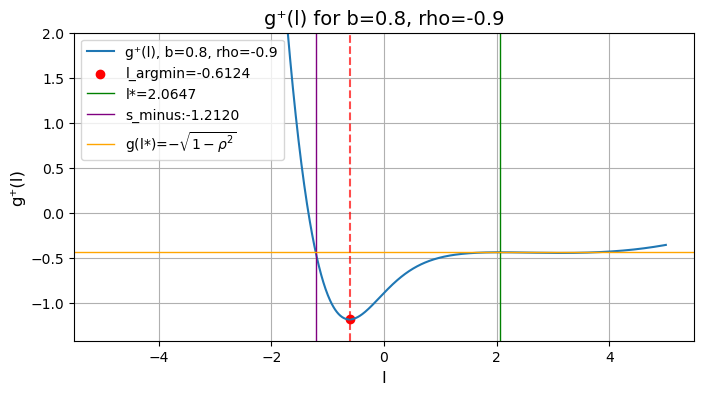

--------------------------------------------------
b=0.8, rho=-0.5
Minimum location l_min = -0.40322384
l_star = 0.57735027
min g_plus(l_min) = -9.85655270e-01


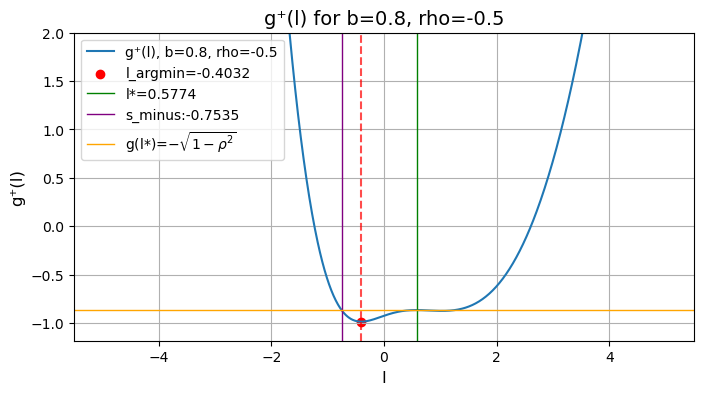

--------------------------------------------------
b=0.8, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


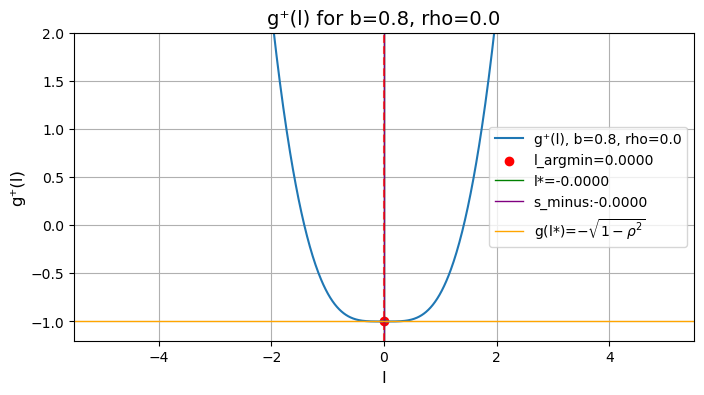

--------------------------------------------------
b=0.8, rho=0.5
Minimum location l_min = -0.57735026
l_star = -0.57735027
min g_plus(l_min) = -8.66025404e-01


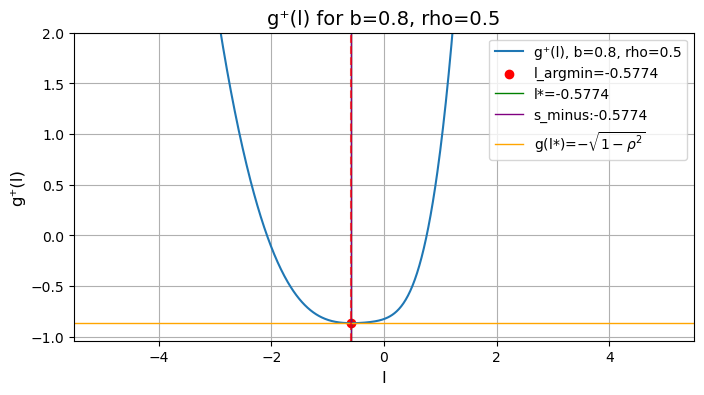

--------------------------------------------------
b=0.8, rho=0.9
Minimum location l_min = -2.06474159
l_star = -2.06474160
min g_plus(l_min) = -4.35889894e-01


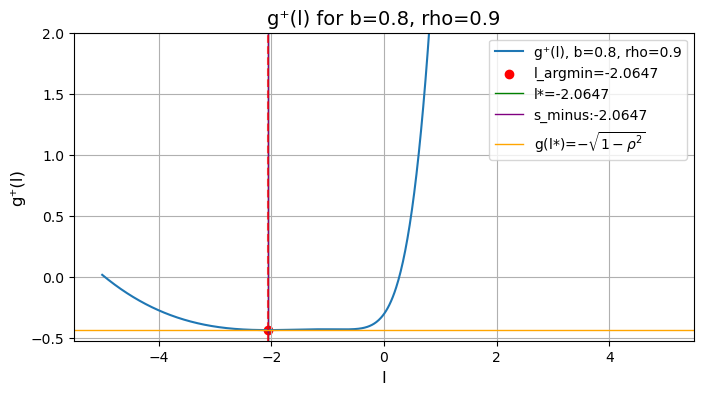

--------------------------------------------------
b=1.0, rho=-0.9
Minimum location l_min = -0.83084465
l_star = 2.06474160
min g_plus(l_min) = -1.51724508e+00


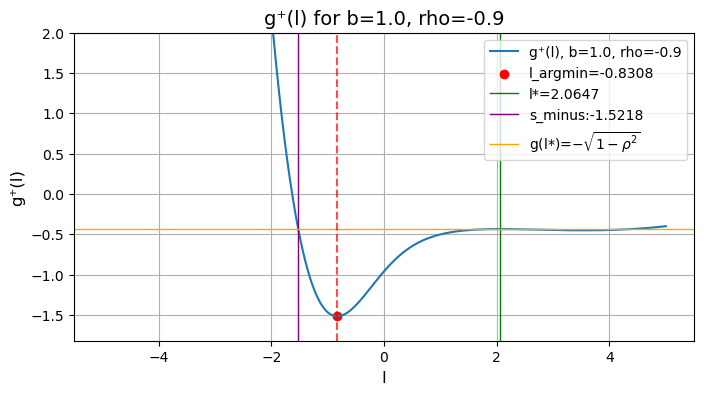

--------------------------------------------------
b=1.0, rho=-0.5
Minimum location l_min = -0.49775052
l_star = 0.57735027
min g_plus(l_min) = -1.03801724e+00


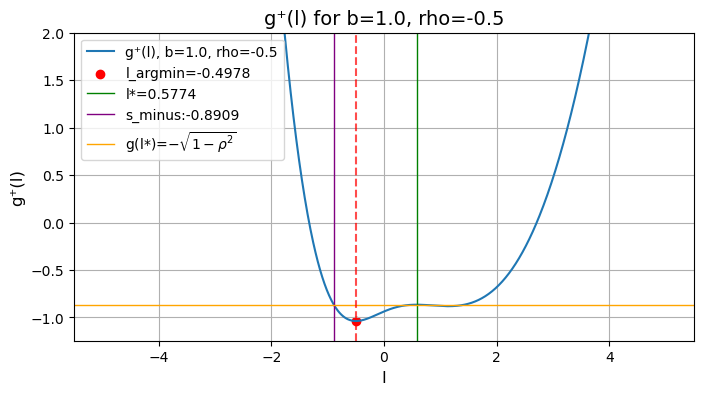

--------------------------------------------------
b=1.0, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


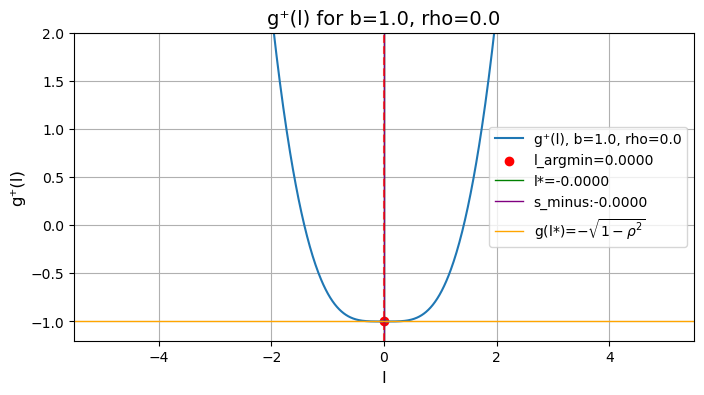

--------------------------------------------------
b=1.0, rho=0.5
Minimum location l_min = -0.57735026
l_star = -0.57735027
min g_plus(l_min) = -8.66025404e-01


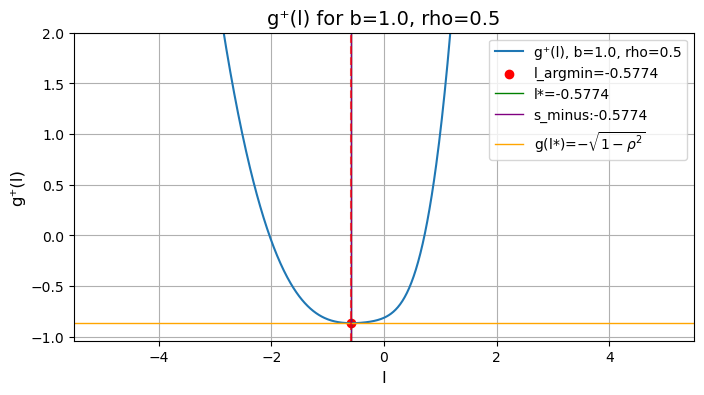

--------------------------------------------------
b=1.2, rho=-0.5
Minimum location l_min = -0.59681712
l_star = 0.57735027
min g_plus(l_min) = -1.10483973e+00


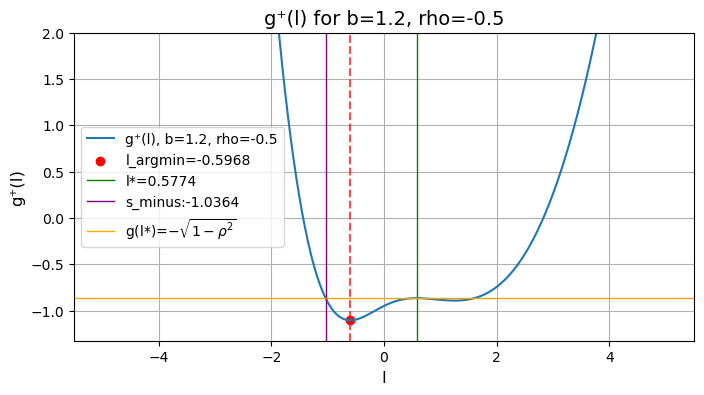

--------------------------------------------------
b=1.2, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


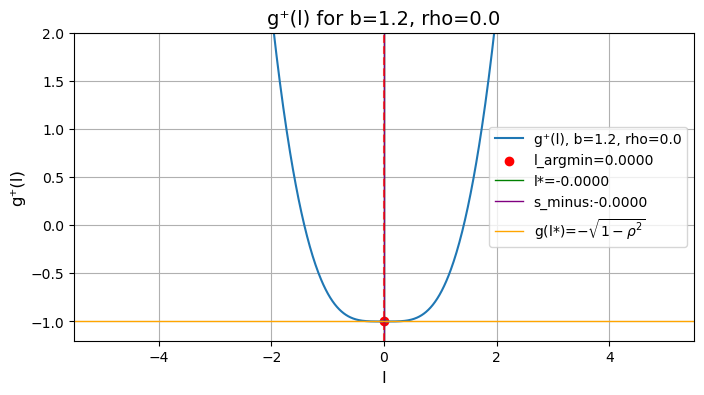

--------------------------------------------------
b=1.2, rho=0.3
Minimum location l_min = -0.31448544
l_star = -0.31448545
min g_plus(l_min) = -9.53939201e-01


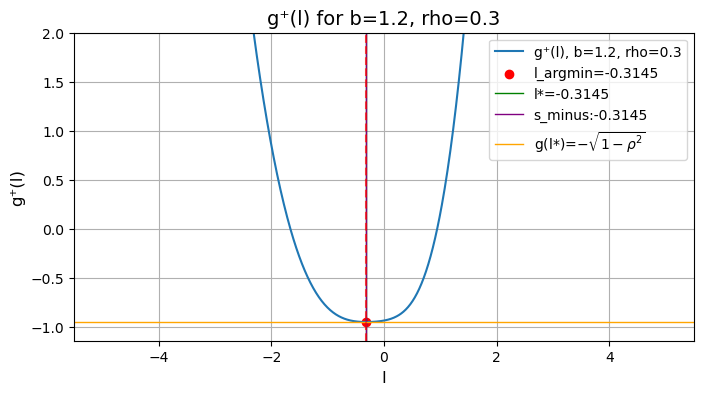

--------------------------------------------------
b=1.5, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


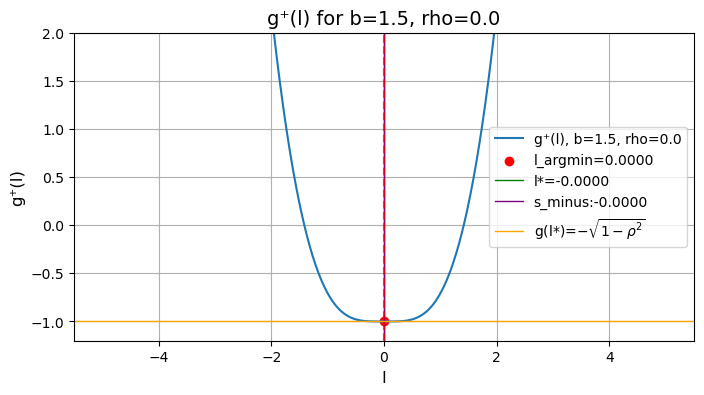

--------------------------------------------------
b=1.5, rho=0.2
Minimum location l_min = -0.20412413
l_star = -0.20412415
min g_plus(l_min) = -9.79795897e-01


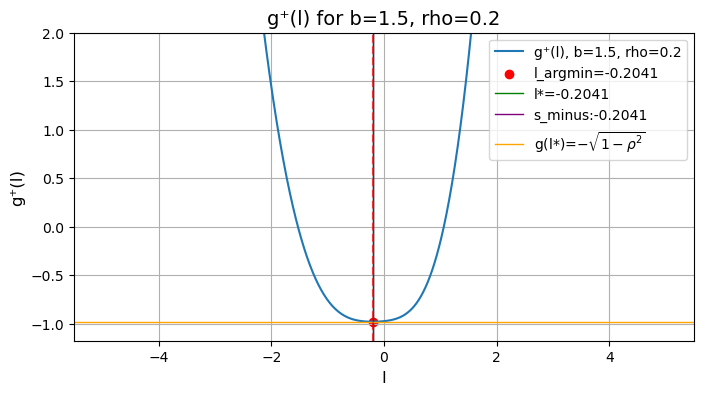

--------------------------------------------------
b=1.7, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
min g_plus(l_min) = -1.00000000e+00


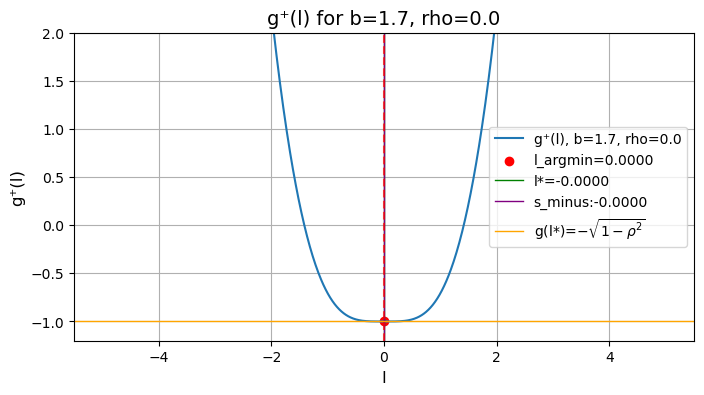

--------------------------------------------------


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def g_minus(l, b, rho):
    term1 = (rho * np.sqrt(l**2 + 1) + l)
    term2 = (np.sqrt(l**2 + 1) * (1/2 + b*rho/4) + b*rho/4)
    term3 = (rho*l + np.sqrt(l**2 + 1))
    return term1**2 * term2 - term3

def find_min_g_minus(b, rho):
    l_upper = 1e6
    l_lower = -1e6
    eps = 1e-8
    max_iter = 500

    iter_count = 0

    while l_upper - l_lower > eps:
        iter_count += 1
        if iter_count > max_iter:
            raise RuntimeError(f"Ternary search did not converge within {max_iter} iterations.")

        l1 = l_lower + (l_upper - l_lower) / 3
        l2 = l_upper - (l_upper - l_lower) / 3

        g1 = g_minus(l1, b, rho)
        g2 = g_minus(l2, b, rho)

        if g1 < g2:
            l_upper = l2
        else:
            l_lower = l1

    l_min = (l_lower + l_upper) / 2
    g_min = g_minus(l_min, b, rho)

    return l_min, g_min

test_cases = [
    (0.5, -0.9),
    (0.5, -0.5),
    (0.5, 0.0),
    (0.5, 0.5),
    (0.5, 0.9),
    
    (0.8, -0.9),
    (0.8, -0.5),
    (0.8, 0.0),
    (0.8, 0.5),
    (0.8, 0.9),
    
    (1.0, -0.9),
    (1.0, -0.5),
    (1.0, 0.0),
    (1.0, 0.5),
    
    (1.2, -0.5),
    (1.2, 0.0),
    (1.2, 0.3),
    
    (1.5, 0.0),
    (1.5, 0.2),
    
    (1.7, 0.0),
]



for idx, (b, rho) in enumerate(test_cases):
    if b * (1 + abs(rho)) >= 2:
        print("Wrong parameters")
        continue
    
    l_star = - rho / np.sqrt(1-rho**2)
    g_l_star = g_minus(l_star, b, rho)
    l_vals = np.linspace(-5, 5, 1000)
    g_vals = [g_minus(l, b, rho) for l in l_vals]

    l_argmin, g_min = find_min_g_minus(b, rho)
    
    def obj(s, b, rho):
        return g_minus(s, b, rho) + np.sqrt(1-rho**2)
    if l_argmin < l_star and not np.isclose(l_argmin, l_star):
        s_minus = brentq(obj, a=-1e6, b=l_argmin, args=(b, rho))
    else:
        s_minus = l_star
    
    print(f"b={b}, rho={rho}")
    print(f"Minimum location l_min = {l_argmin:.8f}")
    print(f"l_star = {l_star:.8f}")
    print(f"min g_plus(l_min) = {g_min:.8e}")
    
    plt.figure(figsize=(8, 4))
    plt.plot(l_vals, g_vals, label=f"g⁺(l), b={b}, rho={rho}")
    plt.scatter(l_argmin, g_min, color='red', label=f"l_argmin={l_argmin:.4f}")
    plt.axvline(l_star, color='green', label=f'l*={-rho/np.sqrt(1-rho**2):.4f}', linewidth=1)
    plt.axvline(s_minus, color='purple', label=f's_minus:{s_minus:.4f}', linewidth=1)
    plt.axhline(-np.sqrt(1-rho**2), color='orange', linestyle='-', linewidth=1, label=r'g(l*)=$-\sqrt{1-\rho^2}$')
    plt.title(f"g⁺(l) for b={b}, rho={rho}", fontsize=14)
    plt.xlabel("l", fontsize=12)
    plt.ylabel("g⁺(l)", fontsize=12)
    plt.ylim([g_min * 1.2, 2])
    plt.axvline(l_argmin, color='red', linestyle='--', alpha=0.7)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("-" * 50)


In [322]:
# from mpmath import mp, mpf, sqrt, findroot
# 
# mp.dps = 32  # 50 decimal places of precision
# 
# eps1 = mpf('1e-4')
# eps2 = mpf('1e-8')
# 
# def get_N(l, alpha, b, rho):
#     return alpha + b * (rho * l + sqrt(l**2 + 1))
# 
# def get_Np(l, b, rho):
#     return b * (rho + l / sqrt(l**2 + 1))
# 
# def get_Npp(l, b):
#     return b / (sqrt(l**2 + 1) ** 3)
# 
# def get_G1(l, alpha, b, rho, mu):
#     N = get_N(l, alpha, b, rho)
#     Np = get_Np(l, b, rho)
#     A1 = 1 - Np * ((l + mu)/(2*N) + mpf('0.25'))
#     A2 = 1 - Np * ((l + mu)/(2*N) - mpf('0.25'))
#     return A1 * A2
# 
# def get_G2(l, alpha, b, rho):
#     N = get_N(l, alpha, b, rho)
#     Np = get_Np(l, b, rho)
#     Npp = get_Npp(l, b)
#     return Npp - Np**2/(2*N)
# 
# def get_G(l, alpha, b, rho, mu, sigma):
#     G1 = get_G1(l, alpha, b, rho, mu)
#     G2 = get_G2(l, alpha, b, rho)
#     return G1 + G2/(2 * sigma)
# 
# def get_l_star(rho):
#     return -rho / sqrt(1 - rho**2)
# 
# def get_g(k, a, b, rho, m, sigma):
#     alpha = a/sigma
#     mu = m/sigma
#     l = k/sigma - k
#     return get_G(l, alpha, b, rho, mu, sigma)
# 
# def get_g_plus(l, b, rho):
#     s = sqrt(l**2 + 1)
#     A1 = (rho * s + l)**2
#     A2 = s * (mpf('0.5') - b * rho / 4) - b * l / 4
#     A3 = rho * l + s
#     return A1 * A2 - A3
# 
# def get_g_minus(l, b, rho):
#     s = sqrt(l**2 + 1)
#     A1 = (rho * s + l)**2
#     A2 = s * (mpf('0.5') + b * rho / 4) + b * l / 4
#     A3 = rho * l + s
#     return A1 * A2 - A3
# 
# def find_g_plus_min(b, rho):
#     from mpmath import fminbound
#     l_star = get_l_star(rho)
#     argmin_l = fminbound(lambda l: get_g_plus(l, b, rho), l_star, mpf('1e6'), xtol=eps1)
#     min_g = get_g_plus(argmin_l, b, rho)
#     return argmin_l, min_g
# 
# def find_g_minus_min(b, rho):
#     from mpmath import fminbound
#     l_star = get_l_star(rho)
#     argmin_l = fminbound(lambda l: get_g_minus(l, b, rho), mpf('-1e6'), l_star, xtol=eps1)
#     min_g = get_g_minus(argmin_l, b, rho)
#     return argmin_l, min_g
# 
# def find_s_plus(b, rho):
#     l_star = get_l_star(rho)
#     argmin_l, min_g = find_g_plus_min(b, rho)
#     def obj(l): return get_g_plus(l, b, rho) + sqrt(1 - rho**2)
#     if l_star >= argmin_l:
#         return l_star
#     return findroot(obj, (argmin_l, mpf('1e6')), solver='bisect')
# 
# def find_s_minus(b, rho):
#     l_star = get_l_star(rho)
#     argmin_l, min_g = find_g_minus_min(b, rho)
#     def obj(l): return get_g_minus(l, b, rho) + sqrt(1 - rho**2)
#     if l_star <= argmin_l:
#         return l_star
#     return findroot(obj, (mpf('-1e6'), argmin_l), solver='bisect')
# 
# def find_l_plus(alpha, b, rho):
#     s_plus = find_s_plus(b, rho)
#     def obj(l): return b * get_g_plus(l, b, rho) - alpha
#     return findroot(obj, (s_plus, mpf('1e6')), solver='bisect')
# 
# def find_l_minus(alpha, b, rho):
#     s_minus = find_s_minus(b, rho)
#     def obj(l): return b * get_g_plus(l, b, rho) - alpha
#     return findroot(obj, (mpf('-1e6'), s_minus), solver='bisect')
# 
# def get_alpha_lower_bound(b, rho):
#     return -b * sqrt(1 - rho**2) + eps2
# 
# def get_l_plus_lower_bound(b, rho):
#     return find_s_plus(b, rho) + eps2
# 
# def get_l_minus_upper_bound(b, rho):
#     return find_s_minus(b, rho) - eps2
# 
# def find_alpha_minus(l_minus, b, rho):
#     def obj(alpha): return b * get_g_minus(l_minus, b, rho) - alpha
#     alpha_lower_bound = get_alpha_lower_bound(b, rho)
#     return findroot(obj, (alpha_lower_bound, mpf('1e6')), solver='bisect')
# 
# def find_alpha_plus(l_plus, b, rho):
#     def obj(alpha): return b * get_g_plus(l_plus, b, rho) - alpha
#     alpha_lower_bound = get_alpha_lower_bound(b, rho)
#     return findroot(obj, (alpha_lower_bound, mpf('1e6')), solver='bisect')


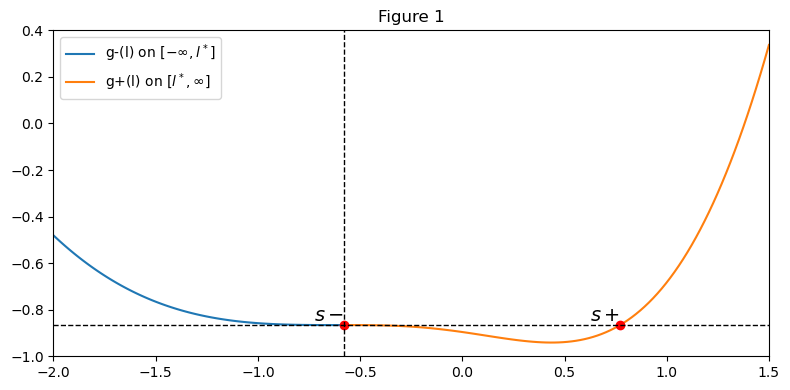

In [309]:
# Figure 1
b = 2/3
rho = 1/2
l_star = get_l_star(rho)
s_plus = find_s_plus(b, rho)
s_minus = find_s_minus(b, rho)

l_minus_lst = np.linspace(-2, l_star, 100)
l_plus_lst = np.linspace(l_star, 1.5, 100)
g_minus_lst = [get_g_minus(l, b, rho) for l in l_minus_lst]
g_plus_lst = [get_g_plus(l, b, rho) for l in l_plus_lst]

plt.figure(figsize=(8, 4))

plt.plot(l_minus_lst, g_minus_lst, label=r"g-(l) on $[-\infty, l^*]$")
plt.plot(l_plus_lst, g_plus_lst, label=r"g+(l) on $[l^*, \infty]$")

plt.plot(s_plus, get_g_plus(s_plus, b, rho), 'ro')
plt.text(s_plus, get_g_plus(s_plus, b, rho), r'$s+$', ha='right', va='bottom', fontsize=14)
plt.plot(s_minus, get_g_minus(s_minus, b, rho), 'ro')
plt.text(s_minus, get_g_minus(s_minus, b, rho), r'$s-$', ha='right', va='bottom', fontsize=14)

plt.axvline(l_star, linestyle='--', color='black', linewidth=1)
plt.axhline(get_g_minus(l_star, b, rho), linestyle='--', color='black', linewidth=1)

plt.ylim(-1, 0.4)
plt.xlim(-2, 1.5)
plt.title("Figure 1")
plt.tight_layout()
plt.legend()
plt.show()

In [331]:
# def find_l_minus(alpha, b, rho):
#     def obj(l, alpha, b, rho):
#         diff = b * get_g_plus(l, b, rho) - alpha
#         if abs(diff) < 0.01:
#             return 0
#         else:
#             return diff
#     s_minus = find_s_minus(b, rho)
#     # exists unique l- s.t. bg(l-)=alpha, l- < s-
#     l_minus = brentq(obj, a=-1e6, b=s_minus, args=(alpha, b, rho))
#     return l_minus

b = 25/21
rho = 2/5
b = 2/3
rho = 1/2
alpha = get_alpha_lower_bound(b, rho)
l = find_s_minus(b, rho)
b * get_g_plus(l, b, rho) - alpha


print(find_l_minus(alpha, b, rho))
print(s_minus)

-0.5773579696743356
-0.548312946894193


In [342]:
b = 25/21
rho = 2/5
alpha_lower_bound = get_alpha_lower_bound(b, rho)
print(find_l_plus(alpha_lower_bound, b, rho))
print(s_plus)

1.9714823360915392
0.7713987341356718


In [340]:
b = 2/3
rho = 1/2
alpha_lower_bound = get_alpha_lower_bound(b, rho)
print(find_l_plus(alpha_lower_bound, b, rho))
print(s_plus)

0.7713987341356718
0.7713987341356718


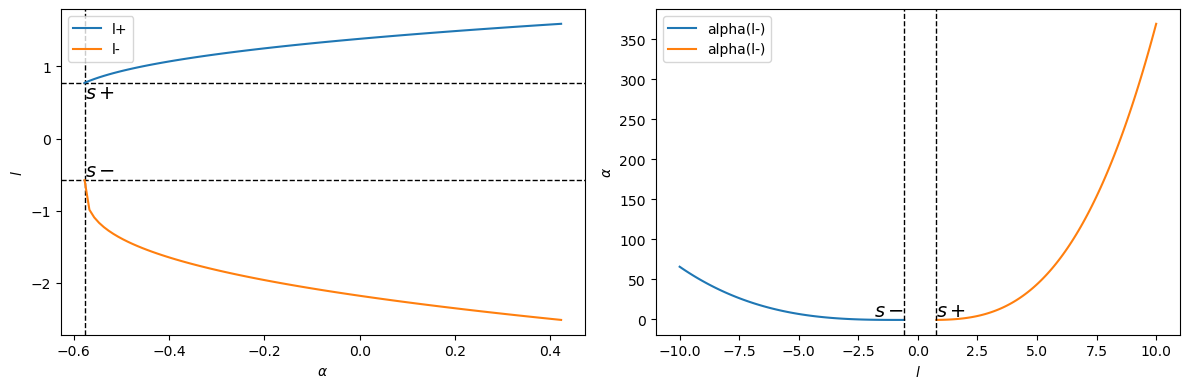

In [333]:
b = 25/21
rho = 2/5
b = 2/3
rho = 1/2
alpha_lower_bound = get_alpha_lower_bound(b, rho)
s_plus = find_s_plus(b, rho)
s_minus = find_s_minus(b, rho)
alpha_lst = np.linspace(alpha_lower_bound, alpha_lower_bound + 1, 100)
l_plus_lst = [find_l_plus(alpha, b, rho) for alpha in alpha_lst]
l_minus_lst = [find_l_minus(alpha, b, rho) for alpha in alpha_lst]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].axhline(s_plus, linestyle='--', color='black', linewidth=1)
axes[0].axhline(s_minus, linestyle='--', color='black', linewidth=1)
axes[0].axvline(alpha_lower_bound, linestyle='--', color='black', linewidth=1)
axes[0].text(alpha_lower_bound, s_plus, r'$s+$', ha='left', va='top', fontsize=14)
axes[0].text(alpha_lower_bound, s_minus, r'$s-$', ha='left', va='bottom', fontsize=14)
axes[0].plot(alpha_lst, l_plus_lst, label='l+')
axes[0].plot(alpha_lst, l_minus_lst, label='l-')
axes[0].set_ylabel(r"$l$")
axes[0].set_xlabel(r"$\alpha$")
axes[0].legend()

l_minus_upper_bound = get_l_minus_upper_bound(b, rho)
l_plus_lower_bound = get_l_plus_lower_bound(b, rho)
l_minus_lst = np.linspace(-10, l_minus_upper_bound, 100)
l_plus_lst = np.linspace(l_plus_lower_bound, 10, 100)
alpha_minus_lst = [find_alpha_minus(l_minus, b, rho) for l_minus in l_minus_lst]
alpha_plus_lst = [find_alpha_plus(l_plus, b, rho) for l_plus in l_plus_lst]
axes[1].plot(l_minus_lst, alpha_minus_lst, label='alpha(l-)')
axes[1].plot(l_plus_lst, alpha_plus_lst, label='alpha(l-)')
axes[1].set_xlabel(r"$l$")
axes[1].set_ylabel(r"$\alpha$")
axes[1].legend()
axes[1].axvline(s_plus, linestyle='--', color='black', linewidth=1)
axes[1].axvline(s_minus, linestyle='--', color='black', linewidth=1)
axes[1].text(s_plus, alpha_lower_bound, r'$s+$', ha='left', va='bottom', fontsize=14)
axes[1].text(s_minus, alpha_lower_bound, r'$s-$', ha='right', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

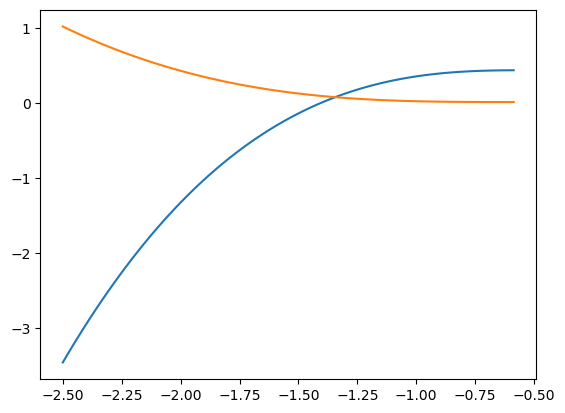

In [306]:
b = 25/21
rho = 2/5
l_minus_upper_bound = get_l_minus_upper_bound(b, rho)
l_minus_lst = np.linspace(-2.5, l_minus_upper_bound, 100)
alpha_lst = [find_alpha_minus(l_minus, b, rho) for l_minus in l_minus_lst]
l_plus_lst = [find_l_plus(alpha, b, rho) for alpha in alpha_lst]
L_minus_lst = [get_L_minus(l_minus, alpha, b, rho) for l_minus, alpha in zip(l_minus_lst, alpha_lst)]
L_plus_lst = [get_L_plus(l_plus, alpha, b, rho) for l_plus, alpha in zip(l_plus_lst, alpha_lst)]
plt.plot(l_minus_lst, L_minus_lst, label='l-minus')
plt.plot(l_minus_lst, L_plus_lst, label='l-plus')
plt.show()

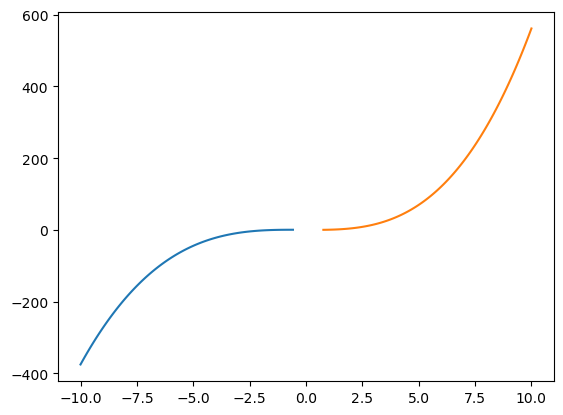

In [300]:
L_minus_lst = [get_L_minus(l_minus, alpha, b, rho) for l_minus, alpha in zip(l_minus_lst, alpha_minus_lst)]
L_plus_lst = [get_L_plus(l_plus, alpha, b, rho) for l_plus, alpha in zip(l_plus_lst, alpha_plus_lst)]
plt.plot(l_minus_lst, L_minus_lst, label='l+')
plt.plot(l_plus_lst, L_plus_lst, label='l-')

In [237]:
l_minus_upper_bound = get_l_minus_upper_bound(b, rho)
l_minus_lst = np.linspace(-10, l_minus_upper_bound, 100)
alpha_minus




ValueError: f(a) and f(b) must have different signs

In [ ]:
# b>=0, rho <= 1, mu in R, sigma >= 0, alpha + b * np.sqrt(1 - rho**2) >= 0

In [118]:
def _N(l, alpha, b, rho):
    return alpha + b * (rho * l + np.sqrt(l**2 + 1))

def _dN(l, b, rho):
    return b * (rho + 1/np.sqrt(l**2 + 1))

def _d2N(l, b):
    return b /(np.sqrt(l**2 + 1)**3)
    
def _G1(l, alpha, b, rho, mu):
    N = _N(l, b, rho)
    Np = _dN(l, b, rho)
    term1 = 1 - Np * ((l + mu)/(2*N) + 1/4)
    term2 = 1 - Np * ((l + mu)/(2*N) - 1/4)
    return term1 * term2
    
def _G2(l, alpha, b, rho, mu):
    N = _N(l, alpha, b, rho)
    Np = _dN(l, b, rho)
    Npp = _d2N(l, b)
    return Npp - Np**2/(2*N)

def _G(l, alpha, b, rho, mu, sigma):
    return _G1(l, alpha, b, rho, mu) + _G2(l, alpha, b, rho, mu) / (2*sigma)

def Durrelman(k, a, b, rho, m, sigma):
    alpha = a / sigma
    mu = a / sigma
    l = (k - m) / sigma
    return _G(l, alpha, b, rho, mu, sigma)
    
def L_plus(l, alpha, b, rho):
    return 2*_N(l, alpha, b, rho) * (1/_dN(l, b, rho) - 1/4) - l

def L_minus(l, alpha, b, rho):
    return 2*_N(l, alpha, b, rho) * (1/_dN(l, b, rho) + 1/4) - l

def get_s_plus(b, rho):
    l_star = - rho / (np.sqrt(1 - rho**2))
    l_argmin, g_min = find_min_g_plus(b, rho)
    
    def obj(s, b, rho):
        return g_plus(s, b, rho) + np.sqrt(1-rho**2)
    
    if l_argmin > l_star and not np.isclose(l_argmin, l_star):
        s_plus = brentq(obj, a=l_argmin, b=1e6, args=(b, rho))
    else: # monotonically increasing
        s_plus = l_star
    
    return s_plus

def get_s_minus(b, rho):
    l_star = - rho / (np.sqrt(1 - rho**2))
    l_argmin, g_min = find_min_g_minus(b, rho)
    
    def obj(s, b, rho):
        return g_minus(s, b, rho) + np.sqrt(1-rho**2)
    
    if l_argmin < l_star and not np.isclose(l_argmin, l_star):
        s_minus = brentq(obj, a=-1e6, b=l_argmin, args=(b, rho))
    else: # monotonically decreasing
        s_minus = l_star
    
    return s_minus

def l_plus(alpha, b, rho):
    def obj(l, alpha, b, rho):
        return b * g_plus(l, b, rho) - alpha
    s_plus = get_s_plus(b, rho)
    
    return brentq(obj, a=s_plus, b=1e6, args=(alpha, b, rho))

def l_minus(alpha, b, rho):
    def obj(l, alpha, b, rho):
        return b * g_minus(l, b, rho) - alpha
    s_minus = get_s_minus(b, rho)
    return brentq(obj, a=-1e6, b=s_minus, args=(alpha, b, rho))
# 
# def F(l, alpha, b, rho):
#     upper_bound = -b*np.sqrt(1-rho**2)
#     alpha = upper_bound # initialize
#     lp = l_plus(alpha, b, rho)
#     lm = l_minus(alpha, b, rho) 
#     
#     def obj(alpha, b, rho):
#         Lp = L_plus(lp, alpha, b, rho)
#         Lm = L_minus(lm, alpha, b, rho)
#         return Lp - Lm
#     
#     brentq(obj, a=-3, b=upper_bound + 0.2, args=(b, rho))
#     
#     
    
#     def obj(alpha, b, rho):
#         lp = l_plus(alpha, b, rho)
#         lm = l_minus(alpha, b, rho)
#         
#         return Lp - Lm
#     
#     
#     km = b * (rho * lm + np.sqrt(lm**2+1))
#     kp = b * (rho * lp + np.sqrt(lp**2+1))
#     dNm = _dN(lm, b, rho)
#     dNp = _dN(lp, b, rho)
#     numerator = 2 * (km/dNm - kp/dNp) + (km + kp)/2 + lp - lm
#     denominator = 2 * (1/dNp - 1/dNm) - 1
# 
# 
# def obj(alpha, b, rho):
#     Lp = L_plus(lp, alpha, b, rho)
#     Lm = L_minus(lp, alpha, b, rho)


In [119]:
alpha = 10
b = 1.2
rho = -0.5
lp = l_plus(alpha, b, rho)
lm = l_minus(alpha, b, rho)
Lp = L_plus(lp, alpha, b, rho)
Lm = L_minus(lm, alpha, b, rho)
print("s_plus:", get_s_plus(b, rho))
print("l_plus:", lp)
print("L_plus:", Lp)
print("s_plus:", get_s_minus(b, rho))
print("l_plus:", lm)
print("L_minus:", Lm)

s_plus: 0.5773502691896258
l_plus: 3.9763302449332185
L_plus: -91.81367610415278
s_plus: -1.0363820739305318
l_plus: -2.544072468404733
L_minus: -173.97460880541362


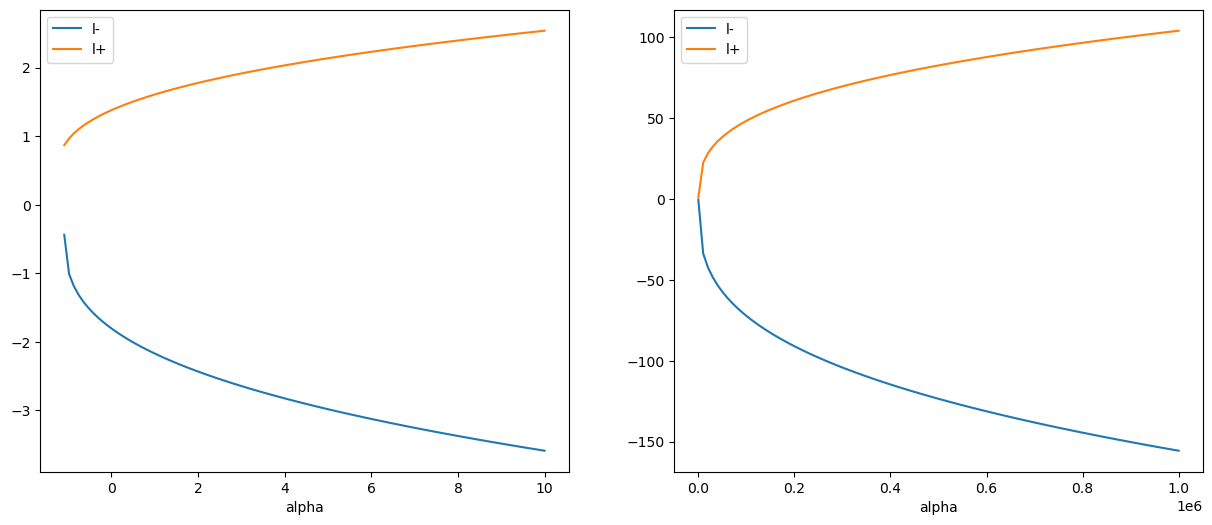

In [137]:
def find_alpha_minus(lm, b, rho):
    def obj(alpha, lm, b, rho):
        return b * g_minus(lm, b, rho) - alpha
    lower_bound = -b*np.sqrt(1-rho**2) + 1e-6
    alpha_minus = brentq(obj, a=lower_bound, b=1e6, args=(lm, b, rho))
    return alpha_minus

b = 25/21
rho = 2/5
eps = 1e-6
alpha_lower_bound = -b*np.sqrt(1-rho**2) + 1e-6

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for i, upper_bound in enumerate([10, 1e6]):
    lm_lst = []
    lp_lst = []
    alpha_lst = []
    for alpha in np.linspace(alpha_lower_bound, upper_bound, 100):
        lm = l_minus(alpha, b, rho)
        lp = l_plus(alpha, b, rho)
        lm_lst.append(lm)
        lp_lst.append(lp)
        alpha_lst.append(alpha)
    
    axes[i].plot(alpha_lst, lm_lst, label = 'l-')
    axes[i].plot(alpha_lst, lp_lst, label = 'l+')
    axes[i].set_xlabel('alpha')
    axes[i].legend()
plt.show()

l- is strictly decreasing with alpha and l+ is strictly increasing with alpha

In [162]:
lm_upper_bound

-0.4386220981804237

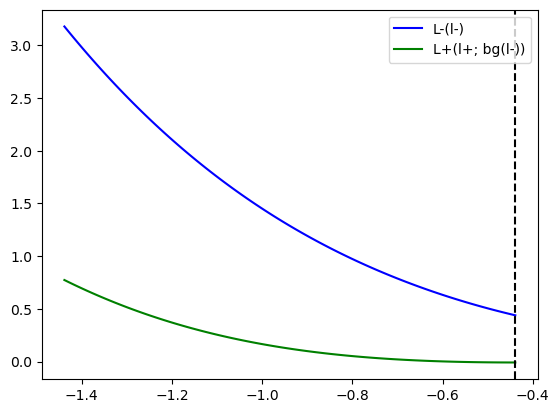

In [161]:
def find_alpha_minus(lm, b, rho):
    def obj(alpha, lm, b, rho):
        return b * g_minus(lm, b, rho) - alpha
    alpha_lower_bound = -b*np.sqrt(1-rho**2) + 1e-6
    return brentq(obj, a=alpha_lower_bound, b=1e6, args=(lm, b, rho))
    

b = 25/21
rho = 2/5
eps = 1e-6
alpha_lower_bound = -b*np.sqrt(1-rho**2) + eps
lm_upper_bound = l_minus(alpha_lower_bound, b, rho) - eps
lm_lst = []
lp_lst = []
Lm_lst = []
Lp_lst = []
alpha_lst = []
for lm in np.linspace(lm_upper_bound - 1, lm_upper_bound, 100):
    alpha = find_alpha_minus(lm, b, rho)
    lp = l_plus(alpha, b, rho)
    Lm = L_minus(lm, alpha, b, rho)
    Lp = L_plus(lp, alpha, b, rho)
    lm_lst.append(lm)
    lp_lst.append(lp)
    Lm_lst.append(Lm)
    Lp_lst.append(Lp)
    alpha_lst.append(alpha)
    
plt.plot(lm_lst, Lm_lst, label = 'L-(l-)', color='blue')
plt.plot(lm_lst, Lp_lst, label = 'L+(l+; bg(l-))', color='green')
plt.axvline(lm_upper_bound, linestyle='--', color='black')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def find_alpha(b, rho):
    

In [120]:
b = 25/21
rho = 2/5
eps = 1e-6

# lm is strictly decreasing with respect to alpha



alpha_lower_bound = -b*np.sqrt(1-rho**2) + 1e-6
lm_upper_bound = l_minus(alpha_lower_bound, b, rho)
alpha = find_alpha_minus(lm_upper_bound, b, rho)


lm_lst = []
lp_lst = []
Lm_lst = []
Lp_lst = []
alpha_lst = []
# 
# for lm in np.linspace(-3, lm_upper_bound, 100):
#     alpha = find_alpha_minus(lm, b, rho)
#     lp = l_plus(alpha, b, rho)
#     Lm = L_minus(lm, alpha, b, rho)
#     Lp = L_plus(lp, alpha, b, rho)
#     
#     alpha_lst.append(alpha)
#     lm_lst.append(lm)
#     lp_lst.append(lp)
#     Lm_lst.append(Lm)
#     Lp_lst.append(Lp)
#     
# plt.plot(lm_lst, Lm_lst)

# find_alpha_minus(lm, b, rho)
# 
# 
b = 0.5
rho = -0.3
alpha_lower_bound = -b*np.sqrt(1-rho**2)
alpha_lst = []
lm_lst = []
Lm_lst = []
for alpha in np.linspace(alpha_lower_bound + eps, 10, 10):
    if b * (1 + abs(rho)) >= 2 or alpha + b * np.sqrt(1 - rho**2) <= 0:
        print(b * (1 + abs(rho)))
        print(alpha + b * np.sqrt(1 - rho**2))
        raise RuntimeError("Invalid input")
    lm = l_minus(alpha, b, rho)
    Lm = L_minus(lm, alpha, b, rho)
    alpha_lst.append(alpha)
    lm_lst.append(lm)
    Lm_lst.append(Lm)

plt.plot(alpha_lst, lm_lst)
plt.show()

plt.plot(lm_lst, Lm_lst)

ValueError: f(a) and f(b) must have different signs

[]

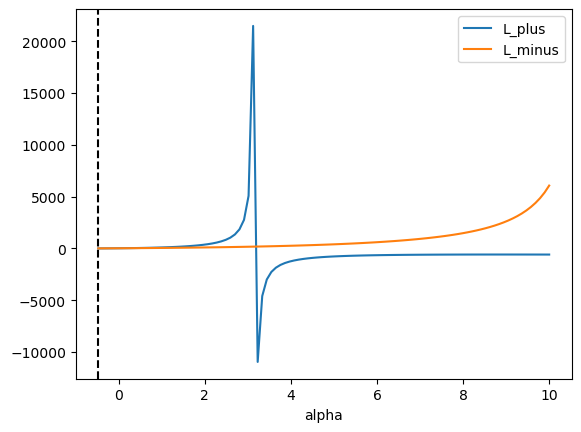

In [114]:
b = 0.5
rho = -0.3
lower_bound = -b*np.sqrt(1-rho**2)
eps = 1e-4
alpha = lower_bound + eps


if b * (1 + abs(rho)) >= 2 or alpha + b * np.sqrt(1 - rho**2) <= 0:
    print(b * (1 + abs(rho)))
    print(alpha + b * np.sqrt(1 - rho**2))
    raise RuntimeError("Invalid input")

lm = l_plus(alpha, b, rho)

Lp = L_plus(lp, alpha, b, rho)
Lm = L_minus(lm, alpha, b, rho)

result_a = []
result_p = []
result_m = []
for alpha in np.linspace(lower_bound + eps, 10, 100):
    lp = l_plus(alpha, b, rho)
    lm = l_minus(alpha, b, rho)
    Lp = L_plus(lp, alpha, b, rho)
    Lm = L_minus(lm, alpha, b, rho)
    if abs(Lp - Lm) < eps:
        print(alpha)
    result_a.append(alpha)
    result_p.append(Lp)
    result_m.append(Lm)

plt.xlabel("alpha")
plt.plot(result_a, result_p, label="L_plus")
plt.plot(result_a, result_m, label="L_minus")
plt.axvline(lower_bound, linestyle='--', color='black')
plt.legend()
plt.show()

In [78]:
lower_bound = -b*np.sqrt(1-rho**2)
alpha = lower_bound
b = 0.7
rho = 0.8

lp = l_plus(alpha, b, rho)
lm = l_minus(alpha, b, rho)
Lp = L_plus(lp, alpha, b, rho)
Lm = L_minus(lm, alpha, b, rho)

result_a = []
result_p = []
result_m = []
for alpha in np.linspace(-10, lower_bound + 0.2, 100):
    Lp = L_plus(lp, alpha, b, rho)
    Lm = L_minus(lm, alpha, b, rho)
    result_a.append(alpha)
    result_p.append(Lp)
    result_m.append(Lm)

plt.xlabel("alpha")
plt.plot(result_a, result_p, label="L_plus")
plt.plot(result_a, result_m, label="L_minus")
plt.axvline(lower_bound, linestyle='--', color='black')
plt.legend()
plt.show()

ValueError: f(a) and f(b) must have different signs

In [70]:
def obj(alpha, b, rho):
    lp = l_plus(alpha, b, rho)
    lm = l_minus(alpha, b, rho)
    Lp = L_plus(lp, alpha, b, rho)
    Lm = L_minus(lm, alpha, b, rho)
    return Lp - Lm

brentq(obj, a=-3, b=upper_bound + 0.2, args=(b, rho))

ValueError: f(a) and f(b) must have different signs

In [54]:
lp = l_plus(alpha, b, rho)
lm = l_minus(alpha, b, rho)

M1 = b*(rho*lm + np.sqrt(lm**2+1))
M2 = b*(rho+lm/np.sqrt(lm**2+1))
P1 = b*(rho*lp + np.sqrt(lp**2+1))
P2 = b*(rho+lp/np.sqrt(lp**2+1))

alpha = (M1 * (1/M2 + 1/4) - P1 * (1/P2 - 1/4) + 0.5*(lp - lm)) / (1/M2 - 1/P2 - 1/2)
alpha

0.7969311032183574

In [65]:
def k(l, b, rho):
    return 

km = k(lm, b, rho)
kp = k(lp, b, rho)
dNm = _dN(lm, b, rho)
dNp = _dN(lp, b, rho)
numerator = 2 * (km/dNm - kp/dNp) + (km + kp)/2 + lp - lm
denominator = 2 * (1/dNp - 1/dNm) - 1

alpha = numerator / denominator
alpha

-2.0193072642287833